In [28]:
from datascience_template import query_dd

# query dask dataframe from clickhouse
# Aggregate values in the database, as loading everything into memory would be too big
data = query_dd(
    """
    select
        customer, type, count(doubleValue) as count
    from 
        vital_data_epoch
    where 
        valueType=0
    group by
        customer, type
    """
)

In [46]:
# everything before caling .compute() is handled by dask on a distributed cluster, .compute() returns a pandas dataframe that is handled on a single thread
df = data.query('type==1000').compute()

# sorting cannot be parallelized, so we can do this in pandas without loss of performance.
df.sort_values('count', inplace=True)

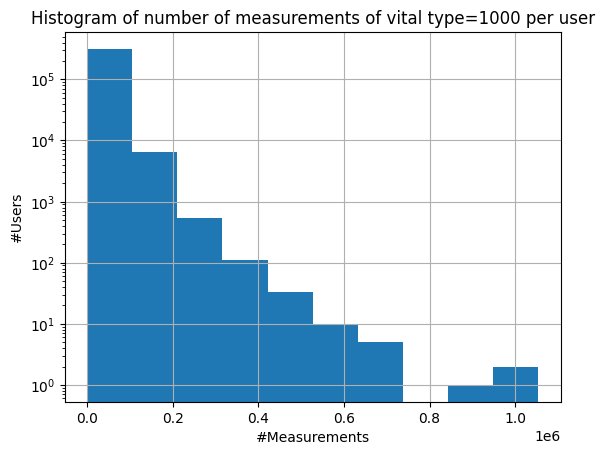

In [48]:
%matplotlib inline%matplotlib inline%matplotlib inline

ax = df1[['count']].hist()[0][0]

ax.set_title('Histogram of number of measurements of vital type=1000 per user')
ax.set_ylabel('#Users')
ax.set_xlabel('#Measurements')
ax.set_yscale('log')